## Naive Bayes
### Feb 13, 2024
#### Kaylee Cho

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.1 Explore and clean Lingspam data**

In [3]:
# 1.1.1
import textwrap
# read csv
emails = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\lingspam-emails.csv", sep="\t")
# extract spam and message columns
emails = emails[["spam", "message"]]
def wrap_text(text):
    return textwrap.fill(text, width=80)
# apply text wrapping to the message column
emails["message"] = emails["message"].apply(wrap_text)
emails

,spam,message
0,False,Subject: re : 2 . 882 s - > np np > date : su...
1,False,Subject: s - > np + np the discussion of s - ...
2,False,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,"Subject: gent conference "" for the listserv ""..."
4,False,Subject: query : causatives in korean could a...
...,...,...
2888,True,Subject: . international driver ' s license n...
2889,True,Subject: new on 95 . 8 capital fm this is new...
2890,True,Subject: re : new medical technology company ...
2891,True,Subject: re : your request for an overview ye...


#### 1.2 priors and probabilities

In [4]:
# 1.2.1 - I kind of solved all of the follow up questions here before reading the questions...!
Pr_S1 = np.mean(emails['spam'] == True) # Pr(S = 1)
Pr_S0 = 1 - Pr_S1 # Pr(S = 0)
word = "million"
# case doesn't matter
Pr_W1 = (emails['message'].str.contains(word, case=False)).mean() # Pr(w = 1)
Pr_W0 = 1 - Pr_W1 # Pr(w = 0)
Pr_W1_S1 = ((emails['spam'] == True) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S1 # Pr(w = 1|S = 1)
Pr_W1_S0 = ((emails['spam'] == False) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 1|S = 0)
Pr_W0_S1 = ((emails['spam'] == True) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S1 # Pr(w = 0|S = 1)
Pr_W0_S0 = ((emails['spam'] == False) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 0|S = 0)
print("Pr(S = 1):", Pr_S1)
print("Pr(S = 0):", Pr_S0)
print("Pr(w = 1):", Pr_W1)
print("Pr(w = 0):", Pr_W0)
print("Pr(w = 1|S = 1):", Pr_W1_S1)
print("Pr(w = 1|S = 0):", Pr_W1_S0)
print("Pr(w = 0|S = 1):", Pr_W0_S1)
print("Pr(w = 0|S = 0):", Pr_W0_S0)

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235
Pr(w = 1): 0.04839267196681645
Pr(w = 0): 0.9516073280331836
Pr(w = 1|S = 1): 0.24116424116424115
Pr(w = 1|S = 0): 0.009950248756218905
Pr(w = 0|S = 1): 0.7588357588357587
Pr(w = 0|S = 0): 0.990049751243781


In [5]:
# 1.2.2
from sklearn.metrics import accuracy_score

y = emails['spam']
# naive model - predicts all emails as non-spam (majority category)
naive_model = pd.Series(False, index=emails.index)
# calculate accuracy
accuracy = accuracy_score(emails['spam'], naive_model)
# Output accuracy and confusion matrix
print("Accuracy:", accuracy)

Accuracy: 0.8337366055997235


In [6]:
# 1.2.3
# more intuitive to work with logical values that implies results as number
x = emails.message.str.lower().str.contains("million").astype(int)
x

0       0
1       0
2       0
3       0
4       0
       ..
2888    0
2889    1
2890    0
2891    1
2892    1
Name: message, Length: 2893, dtype: int32

In [7]:
# 1.2.4
Pr_S1 = np.mean(emails['spam'] == True) # Pr(S = 1)
Pr_S0 = 1 - Pr_S1 # Pr(S = 0)
print("Pr(S = 1):", Pr_S1)
print("Pr(S = 0):", Pr_S0)

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235


#### 1.3 Conditional probabilities

In [8]:
# 1.3.1
Pr_W1 = np.mean(x == 1) # Pr(w = 1)
Pr_W0 = 1 - Pr_W1 # Pr(w = 0)
print("Pr(w = 1):", Pr_W1)
print("Pr(w = 0):", Pr_W0)

Pr(w = 1): 0.04839267196681645
Pr(w = 0): 0.9516073280331836


In [9]:
# 1.3.2
Pr_W1_S1 = ((emails['spam'] == True) & (x == 1)).mean()/Pr_S1 # Pr(w = 1|S = 1)
Pr_W1_S0 = ((emails['spam'] == False) & (x == 1)).mean()/Pr_S0 # Pr(w = 1|S = 0)
print("Pr(w = 1|S = 1):", Pr_W1_S1)
print("Pr(w = 1|S = 0):", Pr_W1_S0)

Pr(w = 1|S = 1): 0.24116424116424115
Pr(w = 1|S = 0): 0.009950248756218905


In [10]:
# 1.3.3
Pr_S1_W1 = (Pr_W1_S1 * Pr_S1)/Pr_W1 # Pr(S = 1|w = 1)
Pr_W0_S1 = ((emails['spam'] == True) & (x == 0)).mean()/Pr_S1  # Pr(w = 0|S = 1)
Pr_S1_W0 = (Pr_W0_S1 * Pr_S1)/Pr_W0 # Pr(S = 1|w = 0)
print("Pr(S = 1|w = 1):", Pr_S1_W1)
print("Pr(S = 1|w = 0):", Pr_S1_W0)

Pr(S = 1|w = 1): 0.8285714285714286
Pr(S = 1|w = 0): 0.1325826371231384


**1.3.4** <br>
**Which of these probabilities have to sum to one?** <br>
e.g. Pr(w = 1) + Pr(w = 0) = 1 <br>
e.g. Pr(s = 1) + pr(s = 0) = 1 <br>
The reason why the above probabilities sum up to one is because adding up those two cases includes all cases in the sample space. <br>
Adding on, there are also examples that does not add up to 1 when added. For instance, <br>
e.g. Pr(w = 1|S = 1) + Pr(w = 1|S = 0) != 1 (it's actually 0.2511...) <br>
The reason is because the specified conditional probabilities above doesn't necessarily contain all the possible cases in the sample space. Instead they represent probabilities conditioned on specific events which doesn't encompass all possible outcomes in the sample space of the conditioning variable. It would be the same for any other combinations above expect for the two cases that I mentioned prior to this explantion which adds up to 1.

#### 1.4 Predict

In [11]:
# 1.4.1
# 0 if word not included, 1 if word included
Pr_S0_W0 = (Pr_W0_S0 * Pr_S0)/Pr_W0
print("Pr(S = 1|w = 1):", Pr_S1_W1)
print("Pr(S = 0|w = 0):", Pr_S0_W0)
# if word exists than spam, if not than it's non-spam (0.5 threshold)
x = emails.message.str.lower().str.contains("million").astype(int)
predict = []
for i in x:
    if (i == 0):
        predict.append(False) # non-spam
    else:
        predict.append(True) # spam
predict = pd.Series(predict, index=range(len(predict)))
predict

Pr(S = 1|w = 1): 0.8285714285714286
Pr(S = 0|w = 0): 0.8674173628768616


0       False
1       False
2       False
3       False
4       False
        ...  
2888    False
2889     True
2890    False
2891     True
2892     True
Length: 2893, dtype: bool

In [12]:
# 1.4.2
# print the resulting confusion matrix - compute accuracy, precision, and recall
tp = ((emails['spam'] == True) & (predict == True)).sum()
fn = ((emails['spam'] == True) & (predict == False)).sum()
fp = ((emails['spam'] == False) & (predict == True)).sum()
tn = ((emails['spam'] == False) & (predict == False)).sum()
print("confusion matrix:")
print("(tp, fp, fn, tn):", tp, fp, fn, tn)
accuracy = (tn+tp)/(tp+fp+fn+tn)
precision = tp/(tp+fp) # how many retrieved items are relevant?
recall = tp/(tp+fn) # how many relevant items are retrieved?
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

confusion matrix:
(tp, fp, fn, tn): 116 24 365 2388
accuracy: 0.8655375043207743
precision: 0.8285714285714286
recall: 0.24116424116424118


**1.4.3**
* which steps above constitute model training?
* In which steps do you use trained model? What is a trained model in this case?
* hint: a trained model is all you need to make predictions from a dataset. <br>
ANSWER: model training involves calculating conditional probabilties. This process constitutes model training because it involves learning the parameters of the model from the training data. Making predictions is where we use those trained model to make predictions.

#### 1.5 Use more words

In [13]:
import warnings
warnings.filterwarnings("ignore")
# 1.5.1 - word: "conference"
# repeat the steps above for words conderence and the, and a few words of your choice.
# Fit the model, predict the spam status, and print confusion matrix and precision/recall.
# 1.2.1 - I kind of solved all of the follow up questions here before reading the questions...!
Pr_S1 = np.mean(emails['spam'] == True) # Pr(S = 1)
Pr_S0 = 1 - Pr_S1 # Pr(S = 0)
word = "conference"
# case doesn't matter
Pr_W1 = (emails['message'].str.contains(word, case=False)).mean() # Pr(w = 1)
Pr_W0 = 1 - Pr_W1 # Pr(w = 0)
Pr_W1_S1 = ((emails['spam'] == True) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S1 # Pr(w = 1|S = 1)
Pr_W1_S0 = ((emails['spam'] == False) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 1|S = 0)
Pr_S1_W1 = (Pr_W1_S1 * Pr_S1)/Pr_W1 # Pr(S = 1|w = 1)
Pr_W0_S1 = ((emails['spam'] == True) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S1  # Pr(w = 0|S = 1)
Pr_S1_W0 = (Pr_W0_S1 * Pr_S1)/Pr_W0 # Pr(S = 1|w = 0)
print("Pr(S = 1):", Pr_S1)
print("Pr(S = 0):", Pr_S0)
print("Pr(w = 1):", Pr_W1)
print("Pr(w = 0):", Pr_W0)
print("Pr(w = 1|S = 1):", Pr_W1_S1)
print("Pr(w = 1|S = 0):", Pr_W1_S0)
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 0.0074
print("Pr(S = 1|w = 0):", Pr_S1_W0) # 0.2147

# 0 if word not included, 1 if word included
print("predictions start")
Pr_W0_S0 = ((emails['spam'] == False) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 0|S = 0)
Pr_S0_W0 = (Pr_W0_S0 * Pr_S0)/Pr_W0
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 0.007 - if word is there: predict non-spam
print("Pr(S = 0|w = 0):", Pr_S0_W0) # 0.785 - if word is not there: predict non-spam

# if word exists than spam, if not than it's non-spam (0.5 threshold)
x = emails.message.str.lower().str.contains(word).astype(int)
predict = []
for i in x:
    if (i == 0):
        predict.append(False) # non-spam
    else:
        predict.append(False) # non-spam
predict = pd.Series(predict, index=range(len(predict)))

# print the resulting confusion matrix - compute accuracy, precision, and recall
tp = ((emails['spam'] == True) & (predict == True)).sum()
fn = ((emails['spam'] == True) & (predict == False)).sum()
fp = ((emails['spam'] == False) & (predict == True)).sum()
tn = ((emails['spam'] == False) & (predict == False)).sum()
print("confusion matrix:")
print("(tp, fp, fn, tn):", tp, fp, fn, tn)
accuracy = (tn+tp)/(tp+fp+fn+tn)
precision = tp/(tp+fp) # how many retrieved items are relevant?
recall = tp/(tp+fn) # how many relevant items are retrieved?
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235
Pr(w = 1): 0.23366747321119943
Pr(w = 0): 0.7663325267888006
Pr(w = 1|S = 1): 0.010395010395010394
Pr(w = 1|S = 0): 0.27819237147595355
Pr(S = 1|w = 1): 0.007396449704142012
Pr(S = 1|w = 0): 0.21470455570590888
predictions start
Pr(S = 1|w = 1): 0.007396449704142012
Pr(S = 0|w = 0): 0.785295444294091
confusion matrix:
(tp, fp, fn, tn): 0 0 481 2412
accuracy: 0.8337366055997235
precision: nan
recall: 0.0


Description: <br>
Accuracy looks about fine which is 83 - not too low and not too high. <br>
precision comes out as a nan value since it has 0 on the denominator. <br>
Also, recall value is zero since the numerator is 0. Reason for those value is because the model training involves naive model which predicts all cases as non-spam resulting FP and TP as 0. This came from conditional probability values calculated above, and that's why we have nan for precision and 0 for recall. <br>
Moreover, word conference appears in much smaller percentage of spam emails(1%) compared to 
the non-spam emails(27.8%). Thereofore, the word "conference" less likely to effectively discriminate betweeen spam and non-spam emails.

In [14]:
# 1.5.1 - word: "the"
# repeat the steps above for words conderence and the, and a few words of your choice.
# Fit the model, predict the spam status, and print confusion matrix and precision/recall.
# 1.2.1 - I kind of solved all of the follow up questions here before reading the questions...!
Pr_S1 = np.mean(emails['spam'] == True) # Pr(S = 1)
Pr_S0 = 1 - Pr_S1 # Pr(S = 0)
word = "the"
# case doesn't matter
Pr_W1 = (emails['message'].str.contains(word, case=False)).mean() # Pr(w = 1)
Pr_W0 = 1 - Pr_W1 # Pr(w = 0)
Pr_W1_S1 = ((emails['spam'] == True) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S1 # Pr(w = 1|S = 1)
Pr_W1_S0 = ((emails['spam'] == False) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 1|S = 0)
Pr_S1_W1 = (Pr_W1_S1 * Pr_S1)/Pr_W1 # Pr(S = 1|w = 1)
Pr_W0_S1 = ((emails['spam'] == True) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S1  # Pr(w = 0|S = 1)
Pr_S1_W0 = (Pr_W0_S1 * Pr_S1)/Pr_W0 # Pr(S = 1|w = 0)
print("Pr(S = 1):", Pr_S1)
print("Pr(S = 0):", Pr_S0)
print("Pr(w = 1):", Pr_W1)
print("Pr(w = 0):", Pr_W0)
print("Pr(w = 1|S = 1):", Pr_W1_S1)
print("Pr(w = 1|S = 0):", Pr_W1_S0)
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 0.0074
print("Pr(S = 1|w = 0):", Pr_S1_W0) # 0.2147

# 0 if word not included, 1 if word included
print("predictions start")
Pr_W0_S0 = ((emails['spam'] == False) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 0|S = 0)
Pr_S0_W0 = (Pr_W0_S0 * Pr_S0)/Pr_W0
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 0.007 - if word is there: predict non-spam
print("Pr(S = 0|w = 0):", Pr_S0_W0) # 0.785 - if word is not there: predict non-spam

# if word exists than spam, if not than it's non-spam (0.5 threshold)
x = emails.message.str.lower().str.contains(word).astype(int)
predict = []
for i in x:
    if (i == 0):
        predict.append(False) # non-spam
    else:
        predict.append(False) # non-spam
predict = pd.Series(predict, index=range(len(predict)))

# print the resulting confusion matrix - compute accuracy, precision, and recall
tp = ((emails['spam'] == True) & (predict == True)).sum()
fn = ((emails['spam'] == True) & (predict == False)).sum()
fp = ((emails['spam'] == False) & (predict == True)).sum()
tn = ((emails['spam'] == False) & (predict == False)).sum()
print("confusion matrix:")
print("(tp, fp, fn, tn):", tp, fp, fn, tn)
accuracy = (tn+tp)/(tp+fp+fn+tn)
precision = tp/(tp+fp) # how many retrieved items are relevant?
recall = tp/(tp+fn) # how many relevant items are retrieved?
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235
Pr(w = 1): 0.9726927065330108
Pr(w = 0): 0.027307293466989235
Pr(w = 1|S = 1): 0.9355509355509355
Pr(w = 1|S = 0): 0.9800995024875622
Pr(S = 1|w = 1): 0.15991471215351813
Pr(S = 1|w = 0): 0.39240506329113994
predictions start
Pr(S = 1|w = 1): 0.15991471215351813
Pr(S = 0|w = 0): 0.6075949367088619
confusion matrix:
(tp, fp, fn, tn): 0 0 481 2412
accuracy: 0.8337366055997235
precision: nan
recall: 0.0


Description: <br>
Accuracy looks about fine. It's around 83 which is not too low and not too high. <br>
Similar to conference, precision comes out as a nan value since it has 0 on the denominator. <br>
Also, recall value is zero since the numerator is 0. Reason for those value is because the model training involves naive model which predicts all cases as non-spam resulting FP and TP as 0. This came from conditional probability values calculated above, and that's why we have nan for precision and 0 for recall. <br>
Adding on, "the" doesn't work well beacuse it's a stop word, meaning that it's very common in both spam and non-spam emails. This indicates that it doesn't carry much discriminatory power. As a result, the model is unable to make meaningful predictions base on this word alone. Beacuse it's present in almost all emails, it doesn't help differentiate between spam and non-spam, hence resulting in poor model performance.

In [15]:
# 1.5.1 - word: "viagra"
# repeat the steps above for words conderence and the, and a few words of your choice.
# Fit the model, predict the spam status, and print confusion matrix and precision/recall.
# 1.2.1 - I kind of solved all of the follow up questions here before reading the questions...!
Pr_S1 = np.mean(emails['spam'] == True) # Pr(S = 1)
Pr_S0 = 1 - Pr_S1 # Pr(S = 0)
word = "viagra"
# case doesn't matter
Pr_W1 = (emails['message'].str.contains(word, case=False)).mean() # Pr(w = 1)
Pr_W0 = 1 - Pr_W1 # Pr(w = 0)
Pr_W1_S1 = ((emails['spam'] == True) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S1 # Pr(w = 1|S = 1)
Pr_W1_S0 = ((emails['spam'] == False) & (emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 1|S = 0)
Pr_S1_W1 = (Pr_W1_S1 * Pr_S1)/Pr_W1 # Pr(S = 1|w = 1)
Pr_W0_S1 = ((emails['spam'] == True) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S1  # Pr(w = 0|S = 1)
Pr_S1_W0 = (Pr_W0_S1 * Pr_S1)/Pr_W0 # Pr(S = 1|w = 0)
print("Pr(S = 1):", Pr_S1)
print("Pr(S = 0):", Pr_S0)
print("Pr(w = 1):", Pr_W1)
print("Pr(w = 0):", Pr_W0)
print("Pr(w = 1|S = 1):", Pr_W1_S1)
print("Pr(w = 1|S = 0):", Pr_W1_S0)
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 0.0074
print("Pr(S = 1|w = 0):", Pr_S1_W0) # 0.2147

# 0 if word not included, 1 if word included
print("predictions start")
Pr_W0_S0 = ((emails['spam'] == False) & (~emails['message'].str.contains(word, case=False))).mean()/Pr_S0 # Pr(w = 0|S = 0)
Pr_S0_W0 = (Pr_W0_S0 * Pr_S0)/Pr_W0
print("Pr(S = 1|w = 1):", Pr_S1_W1) # 1.0 - if word is there: predict spam
print("Pr(S = 0|w = 0):", Pr_S0_W0) # 0.84 - if word is not there: predict non-spam

# if word exists than spam, if not than it's non-spam (0.5 threshold)
x = emails.message.str.lower().str.contains(word).astype(int)
predict = []
for i in x:
    if (i == 0):
        predict.append(False) # non-spam
    else:
        predict.append(True) # spam
predict = pd.Series(predict, index=range(len(predict)))

# print the resulting confusion matrix - compute accuracy, precision, and recall
tp = ((emails['spam'] == True) & (predict == True)).sum()
fn = ((emails['spam'] == True) & (predict == False)).sum()
fp = ((emails['spam'] == False) & (predict == True)).sum()
tn = ((emails['spam'] == False) & (predict == False)).sum()
print("confusion matrix:")
print("(tp, fp, fn, tn):", tp, fp, fn, tn)
accuracy = (tn+tp)/(tp+fp+fn+tn)
precision = tp/(tp+fp) # how many retrieved items are relevant?
recall = tp/(tp+fn) # how many relevant items are retrieved?
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235
Pr(w = 1): 0.0003456619426201175
Pr(w = 0): 0.9996543380573799
Pr(w = 1|S = 1): 0.0020790020790020787
Pr(w = 1|S = 0): 0.0
Pr(S = 1|w = 1): 1.0
Pr(S = 1|w = 0): 0.16597510373443985
predictions start
Pr(S = 1|w = 1): 1.0
Pr(S = 0|w = 0): 0.8340248962655602
confusion matrix:
(tp, fp, fn, tn): 1 0 480 2412
accuracy: 0.8340822675423436
precision: 1.0
recall: 0.002079002079002079


Description: <br>
The word viagra seems to be captured well since the model has very high precision indicating that it captures all the emails that contain the word "viagra" as spam. Accuracy seems just fine 83.4%, but there seems to be issue with recall value because it's very low with 0.002% rate. This indicates that actual positives that were correctly identified were very low in count meaning that the model is failing to identify many spam emails. Low precision rate suggests that the model may not be as effective in other scenarios where detecting all the spam emails as much as possible is essential.

### 2. Navie Bayes

#### 2.1 Prepare Data

In [16]:
# 2.1.1 - vectorize emails so you have a DTM (document term matrix)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True) # 1: if word is present; 0: if not
# define vectorizer
X = vectorizer.fit_transform(emails.message)
vocab = vectorizer.get_feature_names_out() # prints out actual words
token_length = len(vocab)
email_count = X.shape[0]
print("How many different documents?", email_count)
print("How maby different tokens?", token_length)

How many different documents? 2893
How maby different tokens? 60925


In [17]:
# 2.1.2
X[982:985, 40041:40046] # rows 982 to 984, and columns 40,041 - 40,045
# (a) which emails do the rows correspond to?
print(emails['message'][982:985])
# (b) which words do the columns correspond to?
print(vocab[40041:40046])
# (c) what do the '1's in the middle of the table mean?
# one corresponds to the presence of the word in email
# (d) what does zeros mean?
# zero corresponds to the absence of the word in email

982    Subject: summary : parsing of ambiguous sequen...
983    Subject: re : sapir - whorf and what to tell s...
984    Subject: call for contributions  call for cont...
Name: message, dtype: object
['nooteboom' 'nootka' 'nope' 'nor' 'nora']


In [18]:
# 2.1.3
# split data into training and validation
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.2, random_state = 42)

**2.1.4** <br>
naming scheme: <br>
log probability of word present: log_Pr_W1 <br>
log-likelihood of email being spam, given vector of words it contains: log_L_S1_W1 or log_L_S1_W0

In [19]:
sum(yt == True)/len(yt)

0.1707000864304235

#### 2.2 Compute log-likelihoods

In [20]:
# 2.2.1
# implementing naive bayes... only use training data here..
# i.e. we only look for the effect of word's presence (W=1)
log_Pr_S1 = np.log(sum(yt == True)/len(yt))
log_Pr_S0 = np.log(sum(yt == False)/len(yt))
print("logPr(S=1):", log_Pr_S1)
print("logPr(S=0):", log_Pr_S0)

logPr(S=1): -1.7678471428525
logPr(S=0): -0.18717341174592203


In [21]:
print(Xt.shape)
spam_Xt = Xt[yt == True]# spam email in training dataset
spam_Xt.shape
nonspam_Xt = Xt[yt == False] # nonspam email in training dataset
nonspam_Xt.shape

(2314, 60925)


(1919, 60925)

In [22]:
# 2.2.2 
num_1_per_col = np.sum(Xt, axis = 0)
num_0_per_col = Xt.shape[0] - num_1_per_col

word_counts_spam = np.sum(Xt[yt == 1], axis=0)
word_counts_non_spam = np.sum(Xt[yt == 0], axis=0)

pr_w1_s1 = word_counts_spam / num_1_per_col
pr_w1_s0 = word_counts_non_spam / num_0_per_col

log_Pr_W1_S1 = np.log(pr_w1_s1)
log_Pr_W1_S0 = np.log(pr_w1_s0)
print("log Pr(W = 1|S = 1):", log_Pr_W1_S1)
print("log Pr(W = 1|S = 0):", log_Pr_W1_S0)

log Pr(W = 1|S = 1): [[-1.25828479 -0.56188079 -0.69314718 ...        -inf  0.
          nan]]
log Pr(W = 1|S = 0): [[-1.74450658 -3.09247683 -7.74586823 ... -7.74630066        -inf
         -inf]]


**2.2.3** <br>
For both log probabilities, since there are 60925 words in the email the dimension of the vector will be 60925. Each element in these vectors correspond to the log probability of a specific word occuring in emails of the respective spam/not spam category.

#### 2.3 Predict

In [23]:
# 2.3.1
# Compute log-likelihood for class S = 1 using matrix product
ll_S1 = log_Pr_S1 + (Xv @ log_Pr_W1_S1.T)

# Compute log-likelihood for class S = 0 using matrix product
ll_S0 = log_Pr_S0 + (Xv @ log_Pr_W1_S0.T)

# print("log-likelihood (S=1|w):", ll_S1)
# print("log-likelihood (S=0|w):", ll_S0)

**2.3.2** <br>
I have (579, 1) as a shape for my log likelihood for each spam = 1 and spam = 0 case.
The reason for having that specific number is beacuse we are doing predictions on validation dataset which has shape of (579, 60925).

In [24]:
# 2.3.3
# Compare log-likelihoods for classes S = 1 and S = 0
yv = yv.astype(int)
predict = np.where(ll_S1 > ll_S0, 1, 0)
predict = predict.ravel()
print(predict.shape)
print(yv.shape)
# print(predict)
# print(yv)

(579,)
(579,)


In [25]:
# 2.3.4
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(yv, predict)

# Compute accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[493   0]
 [ 86   0]]
Accuracy: 0.8514680483592401


**2.3.5** <br>
The main reason for the mediocre result is likely the presence of zero probabilities and their impact on the log-likelihood calculation. Zero probabilities occur when the word in DTM doesn't appear in the validation data. When computing log likelihoods, taking the logarithm of zero results in negative infinity, and this means that if any word has a zero probability of occurring in that specific class, its log-likelihood will be negatively infinite. This makes the model essentially useless because it can't distinguish between classes based on such extreme values. Smoothing can fix this, which comes out in the next section.

#### 2.4 Add smoothing

In [26]:
# 2.4.1 + 2.4.2
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import math

def fit_naive_bayes(Xt, yt, alpha):
    # Compute priors
    Pr_S1 = (np.sum(yt == 1) + alpha)/(len(yt) + (2 * alpha)) # prior probability of class S = 1
    Pr_S0 = (np.sum(yt == 0) + alpha)/(len(yt) + (2 * alpha)) # prior probability of class S = 0

    log_Pr_S1 = math.log(Pr_S1)
    log_Pr_S0 = math.log(Pr_S0)
    
    word_counts_spam = np.sum(Xt[yt == 1], axis=0)
    word_counts_non_spam = np.sum(Xt[yt == 0], axis=0)
    
    pr_w1_s1 = (word_counts_spam + alpha) / (np.sum(word_counts_spam) + (2 * alpha))
    pr_w1_s0 = (word_counts_non_spam + alpha) / (np.sum(word_counts_non_spam) + (2 * alpha))
    
    log_Pr_W1_S1 = np.log(pr_w1_s1)
    log_Pr_W1_S0 = np.log(pr_w1_s0)
    
    model = {
        "log_Pr_S1": log_Pr_S1,
        "log_Pr_S0": log_Pr_S0,
        "log_Pr_W1_S1": log_Pr_W1_S1,
        "log_Pr_W1_S0": log_Pr_W1_S0
    }
    
    return model

def predict_naive_bayes(model, Xv):
    log_Pr_S1 = model["log_Pr_S1"]
    log_Pr_S0 = model["log_Pr_S0"]
    log_Pr_W1_S1 = model["log_Pr_W1_S1"]
    log_Pr_W1_S0 = model["log_Pr_W1_S0"]
    
    # Compute log-likelihoods
    ll_S1 = log_Pr_S1 + (Xv @ log_Pr_W1_S1.T)
    ll_S0 = log_Pr_S0 + (Xv @ log_Pr_W1_S0.T)
    
    yhat = []
    for i in range(Xv.shape[0]):
        if ll_S1[i] > ll_S0[i]:
            yhat.append(1)
        else:
            yhat.append(0)
            
    return yhat

In [27]:
# 2.4.3 
alpha1 = 0.2
alpha2 = 0.5
alpha3 = 0.9

m1 = fit_naive_bayes(Xt, yt, alpha1)
m1hat = predict_naive_bayes(m1, Xv)
cm1 = confusion_matrix(yv, m1hat)
accuracy1 = accuracy_score(yv, m1hat)

m2 = fit_naive_bayes(Xt, yt, alpha2)
m2hat = predict_naive_bayes(m2, Xv)
cm2 = confusion_matrix(yv, m2hat)
accuracy2 = accuracy_score(yv, m2hat)

m3 = fit_naive_bayes(Xt, yt, alpha3)
m3hat = predict_naive_bayes(m3, Xv)
cm3 = confusion_matrix(yv, m3hat)
accuracy3 = accuracy_score(yv, m3hat)

print("confusion matrix with alpha 1:", cm1)
print("accuracy with alpha 1:", accuracy1)

print("confusion matrix with alpha 2:", cm2)
print("accuracy with alpha 2:", accuracy2)

print("confusion matrix with alpha 3:", cm3)
print("accuracy with alpha 3:", accuracy3)

confusion matrix with alpha 1: [[484   9]
 [  0  86]]
accuracy with alpha 1: 0.9844559585492227
confusion matrix with alpha 2: [[469  24]
 [  0  86]]
accuracy with alpha 2: 0.9585492227979274
confusion matrix with alpha 3: [[444  49]
 [  0  86]]
accuracy with alpha 3: 0.9153713298791019


In [28]:
#  2.4.4
alpha = 1e-8
accuracies = []
while alpha <= 10:
    m = fit_naive_bayes(Xt, yt, alpha)
    yhat = predict_naive_bayes(m, Xv)
    cm = confusion_matrix(yv, yhat)
    accuracy = accuracy_score(yv, yhat)
    accuracies.append(accuracy)
    print('confusion matrix with alpha = ', alpha, ':', cm)
    print('accuracy with alpha =', alpha, ':', accuracy)
    print()
    alpha *= 10

confusion matrix with alpha =  1e-08 : [[492   1]
 [ 11  75]]
accuracy with alpha = 1e-08 : 0.9792746113989638

confusion matrix with alpha =  1e-07 : [[492   1]
 [ 10  76]]
accuracy with alpha = 1e-07 : 0.9810017271157168

confusion matrix with alpha =  1e-06 : [[492   1]
 [  7  79]]
accuracy with alpha = 1e-06 : 0.9861830742659758

confusion matrix with alpha =  9.999999999999999e-06 : [[492   1]
 [  7  79]]
accuracy with alpha = 9.999999999999999e-06 : 0.9861830742659758

confusion matrix with alpha =  9.999999999999999e-05 : [[492   1]
 [  5  81]]
accuracy with alpha = 9.999999999999999e-05 : 0.9896373056994818

confusion matrix with alpha =  0.001 : [[492   1]
 [  3  83]]
accuracy with alpha = 0.001 : 0.9930915371329879

confusion matrix with alpha =  0.01 : [[492   1]
 [  2  84]]
accuracy with alpha = 0.01 : 0.9948186528497409

confusion matrix with alpha =  0.1 : [[491   2]
 [  1  85]]
accuracy with alpha = 0.1 : 0.9948186528497409

confusion matrix with alpha =  1.0 : [[437  56

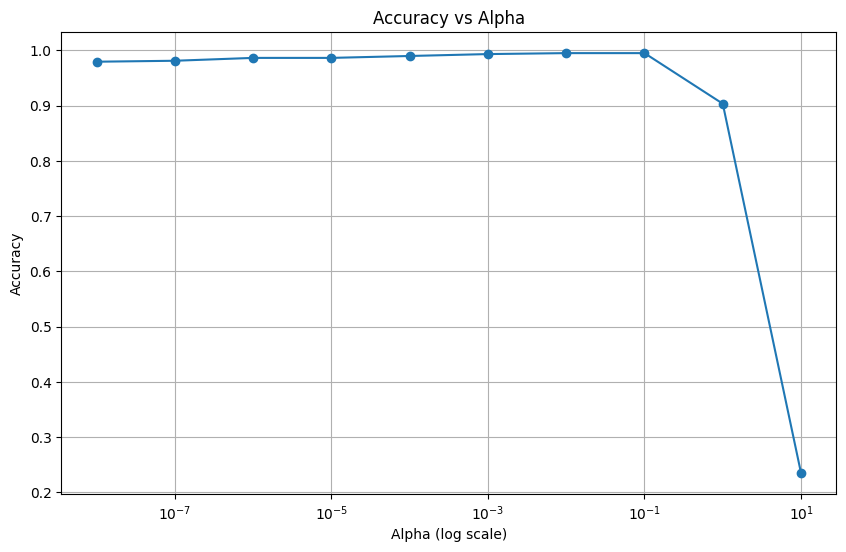

In [29]:
# 2.4.5
import matplotlib.pyplot as plt

alphas = np.logspace (-8, 1, num = 10, endpoint=True)
plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, marker='o', linestyle='-')
plt.xscale('log') 
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha')
plt.grid(True)
plt.show()

### 3. Extra credit

1. <br>
We have NPV as 93.2%. By plugging and checking, NPV = TN/(TN+FN), TN = 4953, and FN = 360. Then by column and row, TP = 77, and FP = 0. These four are the predicted values. Actual positives are 77  + 360 = 437, and acutal negatives is 4953.

2. <br>
The CM has actual values in rows.

3. <br>
CM has positive values displayed first.

4. <br>
FP = 0  ,  FN = 360

In [30]:
# 5.
TN = 4953
FN = 360
TP = 77
FP = 0
cm = [[TN, FP], [FN, TP]]
print(cm)

[[4953, 0], [360, 77]]


6. <br>
NPV stands for Negative Predictive Value, and Se stands for Sensitivity. <br>
negative predictive value = (TN/(TN + FN)) * 100 <br>
this indicates the probability that a negative test result is correct. in this case 93.2% means that among all individuals who tested negative, 93.2% of them are true negative for the condition. <br>
SE = (TP/(TP + FN)) * 100 <br>
sensitivity is also known as positive rate or recall. It indicates the proportion of actual positives that are correctly identified by the test. 17.6$ se means that among all crimes that acutally involved firearms, only 17.6% of them are correctly identified as involving firearms by the Washington State Criminal codes.

In [31]:
# 7.
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_score = (2 * precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Precision: 1.0
Recall: 0.17620137299771166
F-score: 0.29961089494163423
